# Top 15 de armas con mayor número de muertes

Bibliotecas necesarias para la ejecución

In [1]:
import pyodbc 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Definición de parámetros para la conexión con la base de datos

In [2]:
conn_str_esea = (
    r'Driver={SQL Server};'
    r'Server=localhost\MSSQLSERVER01;'
    r'Database=csgo_esea;'
    r'Trusted_Connection=yes;'
    )
cnxn = pyodbc.connect(conn_str_esea)

Definición de query de obtención de datos

In [26]:
query = "SELECT top 15 [wp],COUNT(*) kills FROM [csgo_esea].[dbo].[kills] group by wp order by kills desc"

Carga de datos en dataframes

In [28]:
data = pd.read_sql_query(query, cnxn)

No handles with labels found to put in legend.


NameError: name 'rects2' is not defined

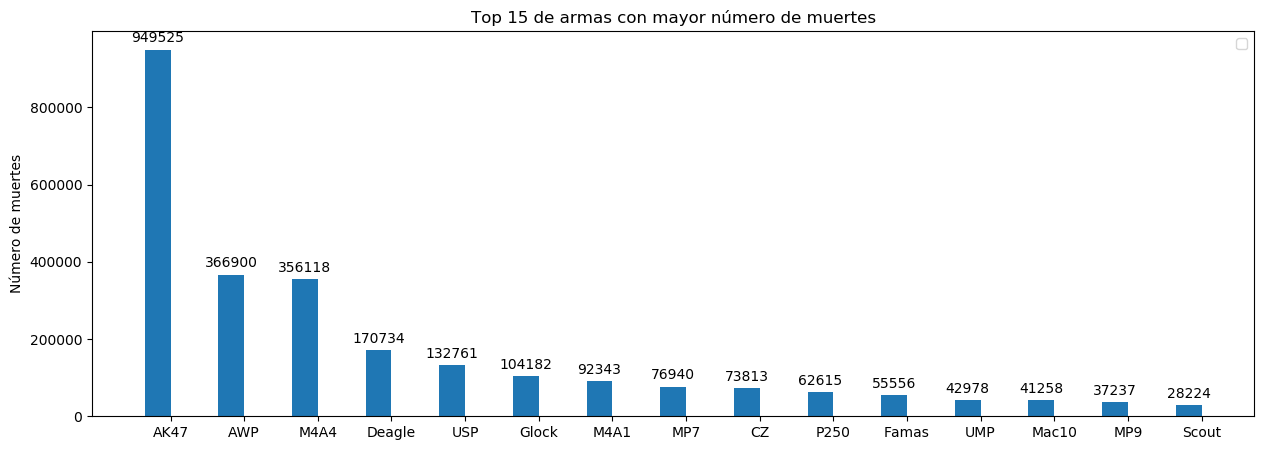

In [31]:
labels = data['wp']
means = data['kills']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means, width)



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Número de muertes')
ax.set_title('Top 15 de armas con mayor número de muertes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()